In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import requests

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns

# Importing the dataset

In [153]:
def get_data(data):
    dataset = pd.read_csv(data)
    X = dataset.drop(columns=['Sales'], axis=1)
    y = pd.DataFrame(data=dataset['Sales'])
    
    return X, y

# Spliting into train and test

In [154]:
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    return X_train, X_test, y_train, y_test

# Training the Multiple Linear Regression model on the Training set

In [155]:
def random_forest_regression(X_train, y_train):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train.ravel())
    
    return regressor

# Evaluating the Model Performance

In [156]:
def evaluate(y_test, y_pred):
    y_test = np.array(y_test, dtype=float)
    
    return r2_score(y_test, y_pred)

# Exporting the results to csv

In [157]:
def organize_prediction(X_pred, y_pred):
    y_pred= pd.DataFrame(data=y_pred, columns=['Sales'])
    y_pred = pd.concat([X_pred, y_pred], axis = 1)

    return y_pred

In [158]:
def export_result(y_pred, file_name):
    result = pd.concat([X_pred, y_pred], axis=1)
    result.to_csv(file_name)
    
    return None

# Visualize results

In [159]:
def plot_graph(y_pred, y_test, y_result):
    new_dataset = y_pred[['Year','Sales', 'Day', 'Month']].groupby(['Year', 'Day', 'Month']).sum().reset_index()
    fig = sns.lineplot(data=new_dataset[(new_dataset['Year'] == 2015) & (new_dataset['Month'] == 8)], x="Day", y="Sales")
    fig.set(xlim=(1,6))
    fig.ticklabel_format(style='plain', axis='y')
    fig.set_title('Accuracy {:.10f}%'.format(evaluate(y_test, y_result)))
    
    return None

# ETL

In [151]:
if __name__ == '__main__':
    # get data
    X, y = get_data('../preprocessed_data/data.csv')
    X_pred = pd.read_csv('../preprocessed_data/X_pred.csv')
    
    # split train and test
    X_train, X_test, y_train, y_test = split_train_test(X.values, y.values)
    
    # train
    regressor = random_forest_regression(X_train, y_train)
    
    # predict
    y_result = regressor.predict(X_test)
    y_pred = regressor.predict(X_pred)
    
    # visualize
    y_pred = organize_prediction(X_pred, y_pred)
    export_result(y_pred, '../result_data/random_forest_regression.csv')
    plot_graph(y_pred, y_test, y_result)

FileNotFoundError: [Errno 2] No such file or directory: 'result_data/random_forest_regression.csv'

In [ ]:
pickle.dump(regressor, open('deploy/random_forest_sales_prediction.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
df_json = X.sample().to_json(orient='records')

In [160]:
url = 'https://rossman-drugstore-sales.herokuapp.com/predict'
data = df_json
headers = {'Content-type': 'application/json'}
r = requests.post(url=url, data=data, headers=headers)

In [124]:
url = 'http://192.168.0.148:5000/predict'
data = df_json
headers = {'Content-type': 'application/json'}
r = requests.post(url=url, data=data, headers=headers)

In [167]:
url = 'http://192.168.0.148:5000/predict'
data = str({"Year":2015,"Month":10})
headers = {'Content-type': 'application/json'}
r = requests.post(url, json={
  "Year": "2015",
  "Month": "9"
})

In [168]:
print(r.json())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [169]:
r.status_code

200

In [170]:
print(r)

<Response [200]>


In [171]:
a = pd.DataFrame(r.json(), columns=r.json()[0].keys())

In [172]:
display(a)

,Unnamed: 0,StoreId,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Mar,May,Nov,Oct,Sept,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Prediction
0,0,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,4805.1
1,1,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,4754.1
2,2,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,4782.8
3,3,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,4947.7
4,4,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,41052,1115,2,5350,1,1970,1,22,1970,1,...,1,0,0,0,1,0,0,0,1,6511.2
14548,41053,1115,2,5350,1,1970,1,22,1970,1,...,1,0,0,0,1,0,0,0,1,8737.9
14549,41054,1115,2,5350,1,1970,1,22,1970,1,...,1,0,0,0,1,0,0,0,1,8708.1
14550,41055,1115,2,5350,1,1970,1,22,1970,1,...,1,0,0,0,1,0,0,0,1,8552.1


In [173]:
display(a[a['Day'] == 1])

,Unnamed: 0,StoreId,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Mar,May,Nov,Oct,Sept,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Prediction
16,16,1,0,1270,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,5686.0
33,64,3,0,14130,1,1970,1,14,1970,1,...,0,0,0,1,0,1,0,0,0,8997.5
50,112,7,2,24000,1,1970,0,24,1970,1,...,0,0,0,0,0,1,0,0,0,12740.6
67,160,8,0,7520,1,1970,0,24,1970,1,...,0,0,0,0,0,1,0,0,0,8087.2
84,208,9,2,2030,1,1970,0,24,1970,1,...,0,0,0,0,0,1,0,0,0,10468.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,40864,1111,0,1900,1,1970,1,31,1970,1,...,0,0,0,1,0,1,0,0,0,5872.2
14500,40912,1112,2,1880,1,1970,0,24,1970,1,...,0,0,0,0,0,0,0,1,0,14201.0
14517,40960,1113,2,9260,1,1970,0,24,1970,1,...,0,0,0,0,0,1,0,0,0,13683.3
14534,41008,1114,2,870,1,1970,0,24,1970,1,...,0,0,0,0,0,1,0,0,0,21101.7


Text(0.5, 1.0, 'Accuracy 0.9053426336%')

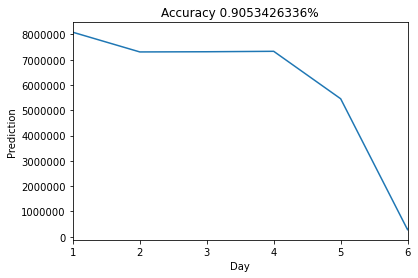

In [174]:
new_dataset = a[['Prediction', 'Day']].groupby('Day').sum().reset_index()
fig = sns.lineplot(data=new_dataset, x="Day", y="Prediction")
fig.set(xlim=(1,6))
fig.ticklabel_format(style='plain', axis='y')
fig.set_title('Accuracy {:.10f}%'.format(evaluate(y_test, y_result)))